# Lebron James Analysis Project

### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('1_lebron_james_shot_chart_1_2023.csv')
print(df.head())

   top  left          date      qtr time_remaining  result  shot_type  \
0  310   203  Oct 18, 2022  1st Qtr          09:26   False          3   
1  213   259  Oct 18, 2022  1st Qtr          08:38   False          2   
2  143   171  Oct 18, 2022  1st Qtr          08:10   False          2   
3   68   215  Oct 18, 2022  1st Qtr          05:24    True          2   
4   66   470  Oct 18, 2022  1st Qtr          01:02   False          3   

   distance_ft   lead  lebron_team_score  opponent_team_score opponent team  \
0           26  False                  2                    2      GSW  LAL   
1           16  False                  4                    5      GSW  LAL   
2           11  False                  4                    7      GSW  LAL   
3            3  False                 12                   19      GSW  LAL   
4           23  False                 22                   23      GSW  LAL   

   season  color  
0    2023    red  
1    2023    red  
2    2023    red  
3    2023 

In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533 entries, 0 to 1532
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   top                  1533 non-null   int64 
 1   left                 1533 non-null   int64 
 2   date                 1533 non-null   object
 3   qtr                  1533 non-null   object
 4   time_remaining       1533 non-null   object
 5   result               1533 non-null   bool  
 6   shot_type            1533 non-null   int64 
 7   distance_ft          1533 non-null   int64 
 8   lead                 1533 non-null   bool  
 9   lebron_team_score    1533 non-null   int64 
 10  opponent_team_score  1533 non-null   int64 
 11  opponent             1533 non-null   object
 12  team                 1533 non-null   object
 13  season               1533 non-null   int64 
 14  color                1533 non-null   object
dtypes: bool(2), int64(7), object(6)
memory usage: 158.8+ KB

In [ ]:
for column in df.columns:
  print(f"Value counts for {column}:")
  print(df[column].value_counts())
  print("\n")

Value counts for top:
top
67     40
68     35
58     34
69     31
63     28
       ..
364     1
275     1
203     1
191     1
232     1
Name: count, Length: 298, dtype: int64


Value counts for left:
left
240    67
242    36
238    30
243    26
237    25
       ..
312     1
414     1
88      1
442     1
274     1
Name: count, Length: 369, dtype: int64


Value counts for date:
date
Jan 28, 2023    30
Jan 24, 2023    29
Jan 12, 2023    28
Jan 7, 2023     28
Apr 4, 2023     27
                ..
Feb 15, 2023    14
May 12, 2023    14
Apr 28, 2023    13
May 6, 2023     11
Mar 26, 2023    11
Name: count, Length: 72, dtype: int64


Value counts for qtr:
qtr
2nd Qtr    406
4th Qtr    400
3rd Qtr    374
1st Qtr    321
1st OT      28
2nd OT       4
Name: count, dtype: int64


Value counts for time_remaining:
time_remaining
00:00    14
00:01     8
11:17     8
10:27     8
09:48     7
         ..
11:37     1
04:54     1
03:55     1
05:04     1
03:20     1
Name: count, Length: 614, dtype: int64


Va

### Data Preprocessing Steps

#### 1. Dropping `date` Column
We want to focus on the in-game actions rather than analyzing data based on the date. Therefore, the `date` column is not relevant to our analysis and will be dropped.

#### 2. Dropping `team` and `season` Columns
Both the `team` and `season` columns have constant values of 1533, as all the data represents LeBron James playing for the Los Angeles Lakers during the 2023 season. Since these columns provide no additional variability, they will be removed.

#### 3. Dropping `color` Column
The `color` column indicates whether a shot is made or missed, which is redundant with the `shot_type` column. Since `shot_type` already serves this purpose, we will drop `color` and keep `shot_type` to avoid duplicating information.


In [ ]:
df = df.drop(['date', 'team', 'season', 'color'], axis=1)
df.head()

,top,left,qtr,time_remaining,result,shot_type,distance_ft,lead,lebron_team_score,opponent_team_score,opponent
0,310,203,1st Qtr,09:26,False,3,26,False,2,2,GSW
1,213,259,1st Qtr,08:38,False,2,16,False,4,5,GSW
2,143,171,1st Qtr,08:10,False,2,11,False,4,7,GSW
3,68,215,1st Qtr,05:24,True,2,3,False,12,19,GSW
4,66,470,1st Qtr,01:02,False,3,23,False,22,23,GSW


In [ ]:
df1 = df.copy()

### Converting Categorical Columns to Numerical

#### 1. Changing `qtr` to Numerical Values
The `qtr` column represents the game quarter. We'll map it to numerical values `[1, 2, 3, 4]` to reflect the four quarters of the game.

#### 2. Binary Encoding for `result`
The `result` column will be converted into binary values:
- `0` for missed shots
- `1` for made shots

#### 3. Binary Encoding for `lead`
Similarly, we will apply binary encoding to the `lead` column:
- `0` for losing
- `1` for leading

#### 4. Frequency Encoding for `opponent`
The `opponent` column contains 27 unique categorical values, representing different teams. Using one-hot encoding would dramatically increase the dimensionality of the dataset, so we will use frequency encoding to map each opponent to the proportion of games played against them.

#### 5. Converting `time_remaining` to Seconds
The `time_remaining` column represents the minutes and seconds left in the quarter. We will convert this to the total seconds remaining in the game to better analyze high-pressure situations as the game nears its end.

In [ ]:
# Mapping qtr to numerical values
qtr_mapping = {
    '1st Qtr': 1,
    '2nd Qtr': 2,
    '3rd Qtr': 3,
    '4th Qtr': 4
}
df['qtr'] = df1['qtr'].map(qtr_mapping)

# Binary encoding for result
result_mapping = {
    False : 0,
    True : 1
}
df['result'] = df1['result'].map(result_mapping)

# Binary encoding for lead
lead_mapping = {
    False : 0,
    True : 1
}
df['lead'] = df1['lead'].map(lead_mapping)

# Frequency encoding for opponent
opponent_counts = df['opponent'].value_counts(normalize=True)
df['opponent'] = df1['opponent'].map(opponent_counts)

In [ ]:
df.head()

,top,left,qtr,time_remaining,result,shot_type,distance_ft,lead,lebron_team_score,opponent_team_score,opponent
0,310,203,1.0,09:26,0,3,26,0,2,2,0.100457
1,213,259,1.0,08:38,0,2,16,0,4,5,0.100457
2,143,171,1.0,08:10,0,2,11,0,4,7,0.100457
3,68,215,1.0,05:24,1,2,3,0,12,19,0.100457
4,66,470,1.0,01:02,0,3,23,0,22,23,0.100457


In [ ]:
def convert_time_remaining(row):
  qtr = row['qtr']
  time_remaining = row['time_remaining']
  minutes, seconds = map(int, time_remaining.split(':'))
  total_seconds = minutes * 60 + seconds

  if qtr == 1:
    total_seconds += 36 * 60
  elif qtr == 2:
    total_seconds += 24 * 60
  elif qtr == 3:
    total_seconds += 12 * 60

  return total_seconds

df['time_remaining'] = df.apply(convert_time_remaining, axis=1)
df.head()

,top,left,qtr,time_remaining,result,shot_type,distance_ft,lead,lebron_team_score,opponent_team_score,opponent
0,310,203,1.0,2726,0,3,26,0,2,2,0.100457
1,213,259,1.0,2678,0,2,16,0,4,5,0.100457
2,143,171,1.0,2650,0,2,11,0,4,7,0.100457
3,68,215,1.0,2484,1,2,3,0,12,19,0.100457
4,66,470,1.0,2222,0,3,23,0,22,23,0.100457


In [ ]:
# Function to find outliers using IQR
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Dictionary to store percentage of outliers for each column
outlier_percentage_dict = {}

# Iterate through each numerical column to find outliers
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    outliers = find_outliers_iqr(df[column])
    outlier_count = outliers.count()
    total_count = len(df[column])

    # Calculate the percentage of outliers
    outlier_percentage = (outlier_count / total_count) * 100
    outlier_percentage_dict[column] = outlier_percentage

# Print the percentage of outliers for each column
for column, percentage in outlier_percentage_dict.items():
    print(f"Percentage of outliers in '{column}' column: {percentage:.2f}%")

Percentage of outliers in 'top' column: 0.00%
Percentage of outliers in 'left' column: 17.29%
Percentage of outliers in 'qtr' column: 0.00%
Percentage of outliers in 'time_remaining' column: 0.00%
Percentage of outliers in 'result' column: 0.00%
Percentage of outliers in 'shot_type' column: 0.00%
Percentage of outliers in 'distance_ft' column: 0.00%
Percentage of outliers in 'lead' column: 0.00%
Percentage of outliers in 'lebron_team_score' column: 0.00%
Percentage of outliers in 'opponent_team_score' column: 0.00%
Percentage of outliers in 'opponent' column: 0.00%


In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Initialize scalers
standard_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

# Identify columns to scale
columns_with_outliers = ['left']  # Column with outliers
other_columns = df.select_dtypes(include=['float64', 'int64']).columns.difference(columns_with_outliers).tolist()

# Create a new DataFrame for the scaled values
scaled_df = df.copy()  # Start with a copy of the original DataFrame

# Scale the column with outliers using RobustScaler
scaled_df[columns_with_outliers] = robust_scaler.fit_transform(df[columns_with_outliers])

# Scale the other columns using StandardScaler
scaled_df[other_columns] = standard_scaler.fit_transform(df[other_columns])

# Display the scaled DataFrame
print("Scaled DataFrame:")
print(scaled_df)

Scaled DataFrame:
           top      left  qtr  time_remaining  result  shot_type  distance_ft  \
0     0.776204 -0.514706  0.0        0.950820     0.0        1.0     0.764706   
1     0.501416  0.308824  0.0        0.934077     0.0        0.0     0.470588   
2     0.303116 -0.985294  0.0        0.924311     0.0        0.0     0.323529   
3     0.090652 -0.338235  0.0        0.866411     1.0        0.0     0.088235   
4     0.084986  3.411765  0.0        0.775026     0.0        1.0     0.676471   
...        ...       ...  ...             ...     ...        ...          ...   
1528  0.232295  0.529412  1.0        0.142658     0.0        0.0     0.235294   
1529  0.206799 -0.250000  1.0        0.105685     0.0        0.0     0.176471   
1530  0.118980  0.235294  1.0        0.069759     1.0        0.0     0.088235   
1531  0.118980 -2.823529  1.0        0.009069     0.0        0.0     0.588235   
1532  0.062323 -0.676471  1.0        0.000349     0.0        0.0     0.147059   

      lea

### Exploratory Data Analysis (EDA)

In [ ]:
# Shot frequency analysis by shot type and quarter
shot_frequency = df.groupby(['qtr', 'shot_type']).size()

# Success rate analysis by shot type and quarter
success_rate = df[df['result'] == 1].groupby(['qtr', 'shot_type']).size() / df.groupby(['qtr', 'shot_type']).size() * 100

# Combine both results into one DataFrame
analysis = pd.DataFrame({'Shot Frequency': shot_frequency, 'Success Rate (%)': success_rate})

# Reset index to make the DataFrame more readable
analysis.reset_index(inplace=True)

# Display the result
print(analysis)

   qtr  shot_type  Shot Frequency  Success Rate (%)
0  1.0          2             217         54.838710
1  1.0          3             104         35.576923
2  2.0          2             291         63.230241
3  2.0          3             115         27.826087
4  3.0          2             260         60.384615
5  3.0          3             114         35.964912
6  4.0          2             256         56.640625
7  4.0          3             144         28.472222


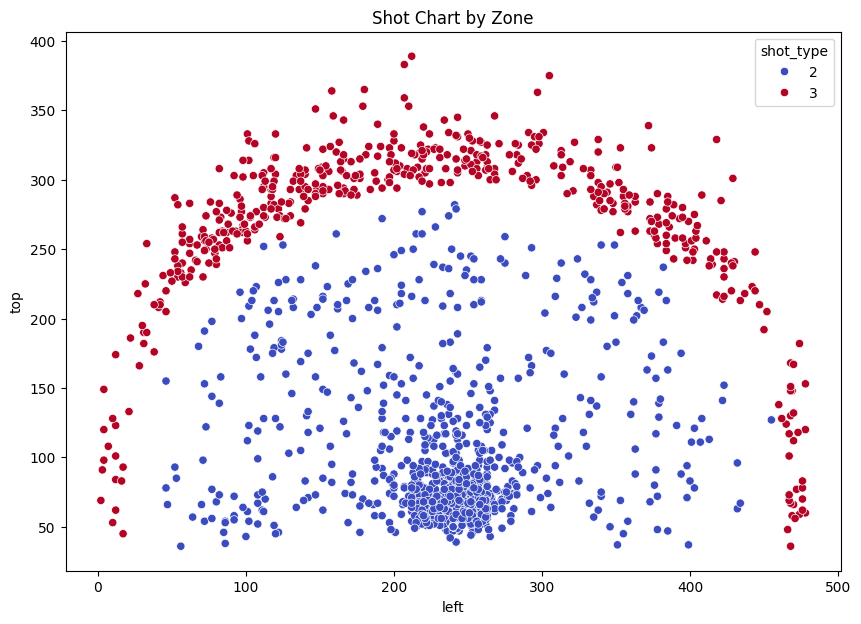

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the shot zones
plt.figure(figsize=(10, 7))
sns.scatterplot(x='left', y='top', hue='shot_type', data=df, palette='coolwarm')
plt.title('Shot Chart by Zone')
plt.show()

In [ ]:
import pandas as pd

# Define time bins and corresponding labels
bins = [0, 180, 360, 540, 720]  # Ranges for time_remaining (e.g., 0-180, 181-360, etc.)
labels = ['0-180', '181-360', '361-540', '541-720']

# Filter the data for the 4th quarter
df_4th_qtr = df[df['qtr'] == 4]

# Create a new column for time ranges based on time_remaining
df_4th_qtr['time_range'] = pd.cut(df_4th_qtr['time_remaining'], bins=bins, labels=labels, include_lowest=True)

# Shot frequency analysis by time range and shot_type in the 4th quarter
shot_frequency_4th_qtr = df_4th_qtr.groupby(['time_range', 'shot_type']).size()

# Success rate analysis by time range and shot_type in the 4th quarter
success_rate_4th_qtr = df_4th_qtr[df_4th_qtr['result'] == 1].groupby(['time_range', 'shot_type']).size() / df_4th_qtr.groupby(['time_range', 'shot_type']).size() * 100

# Combine both results into one DataFrame
analysis_4th_qtr = pd.DataFrame({'Shot Frequency': shot_frequency_4th_qtr, 'Success Rate (%)': success_rate_4th_qtr})

# Reset index to make the DataFrame more readable
analysis_4th_qtr.reset_index(inplace=True)

# Display the result
print(analysis_4th_qtr)

  time_range  shot_type  Shot Frequency  Success Rate (%)
0      0-180          2              55         50.909091
1      0-180          3              40         20.000000
2    181-360          2              70         61.428571
3    181-360          3              22         45.454545
4    361-540          2              65         53.846154
5    361-540          3              44         31.818182
6    541-720          2              66         59.090909
7    541-720          3              38         23.684211


<ipython-input-210-ac6fe00cc2a6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4th_qtr['time_range'] = pd.cut(df_4th_qtr['time_remaining'], bins=bins, labels=labels, include_lowest=True)
<ipython-input-210-ac6fe00cc2a6>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shot_frequency_4th_qtr = df_4th_qtr.groupby(['time_range', 'shot_type']).size()
<ipython-input-210-ac6fe00cc2a6>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or ob

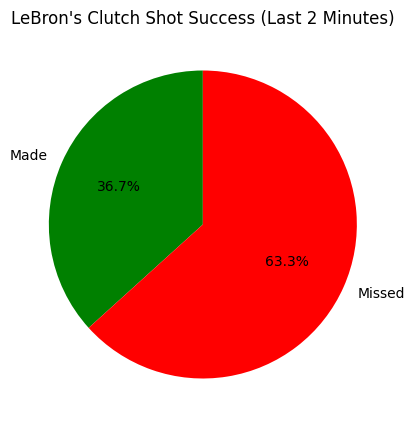

In [ ]:
# Filter for clutch situations (last 2 minutes of the game)
clutch_shots = df[df['time_remaining'] <= 120]

# Shot frequency and success rate in clutch situations
clutch_shot_frequency = clutch_shots.shape[0]
clutch_success_rate = clutch_shots[clutch_shots['result'] == 1].shape[0] / clutch_shot_frequency * 100

# Visualization of shot success in clutch situations
clutch_results = ['Made', 'Missed']
clutch_values = [clutch_shots[clutch_shots['result'] == 1].shape[0], clutch_shots[clutch_shots['result'] == 0].shape[0]]

# Plotting clutch performance
fig, ax = plt.subplots(figsize=(7, 5))
ax.pie(clutch_values, labels=clutch_results, autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
ax.set_title("LeBron's Clutch Shot Success (Last 2 Minutes)")
plt.show()

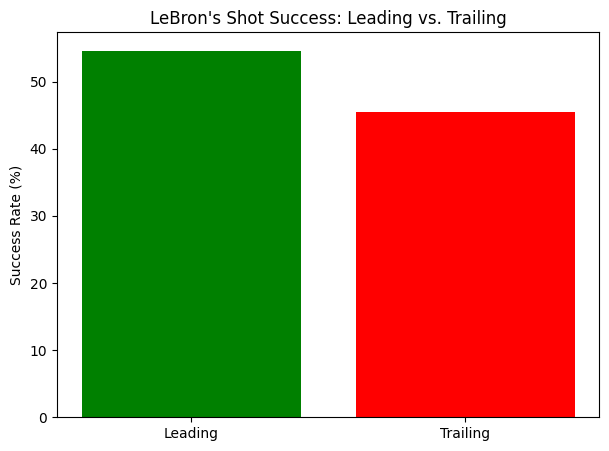

In [ ]:
# Split data based on lead/deficit
leading_shots = df[df['lead'] == 1]
trailing_shots = df[df['lead'] == 0]

# Shot frequency and success rate in each game context
leading_success_rate = leading_shots[leading_shots['result'] == 1].shape[0] / leading_shots.shape[0] * 100
trailing_success_rate = trailing_shots[trailing_shots['result'] == 1].shape[0] / trailing_shots.shape[0] * 100

# Visualization of success rate based on game context
context_labels = ['Leading', 'Trailing']
context_values = [leading_success_rate, trailing_success_rate]

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(context_labels, context_values, color=['green', 'red'])
ax.set_title("LeBron's Shot Success: Leading vs. Trailing")
ax.set_ylabel('Success Rate (%)')
plt.show()

### Modelling (Hierarchical Clustering)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Prepare features and target (result of the shot)
X = scaled_df.drop(columns=['result'])  # Drop the 'result' since it's the target
y = scaled_df['result']

# Train a Random Forest Classifier
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
importances = rf.feature_importances_

# Rank feature importance
feature_names = X.columns
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)
print(feature_importance)

               feature  importance
5          distance_ft    0.207747
1                 left    0.158478
0                  top    0.142230
3       time_remaining    0.137941
7    lebron_team_score    0.113414
9             opponent    0.104956
8  opponent_team_score    0.101662
6                 lead    0.020768
2                  qtr    0.010363
4            shot_type    0.002439


In [ ]:
# Select the top 7 important features for clustering
top_features = feature_importance['feature'][:7]  # Change the number of features based on importance
features_for_clustering = scaled_df[top_features]

# Perform clustering with the selected features
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=5)
clusters = agg_clustering.fit_predict(features_for_clustering)

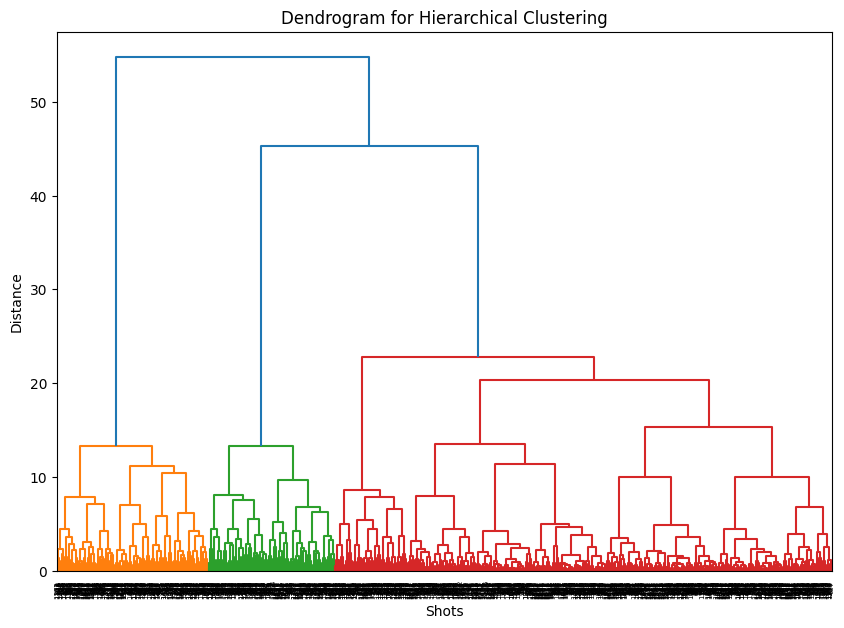

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 2: Applying Hierarchical Clustering
# Create the linkage matrix using Ward's method
scaled_df = scaled_df.replace([np.inf, -np.inf], np.nan) # Replace infinite values with NaN
scaled_df = scaled_df.fillna(scaled_df.mean()) # Replace NaN with the mean of each column
linked = linkage(scaled_df, method='ward')

# Plot the dendrogram to visualize the clusters
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=scaled_df.index, distance_sort='ascending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Shots')
plt.ylabel('Distance')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Loop over different numbers of clusters
for n_clusters in range(2, 10):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    cluster_labels = agg_clustering.fit_predict(features_for_clustering)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(features_for_clustering, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.4323973313112072
For n_clusters = 3, the silhouette score is 0.4520649991113895
For n_clusters = 4, the silhouette score is 0.38373079113067116
For n_clusters = 5, the silhouette score is 0.33569999636999376
For n_clusters = 6, the silhouette score is 0.2398761753112375
For n_clusters = 7, the silhouette score is 0.25327159445476216
For n_clusters = 8, the silhouette score is 0.2547178301702767
For n_clusters = 9, the silhouette score is 0.2438898798528769


In [ ]:
# Step 3: Defining Clusters
n_clusters = 4  # Define the number of clusters based on the dendrogram
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
cluster_labels = agg_clustering.fit_predict(scaled_df)

# Add the cluster labels to the original dataset
scaled_df['cluster'] = cluster_labels

# Display the first few rows of the clustered data
print(scaled_df.head())

        top      left  qtr  time_remaining  result  shot_type  distance_ft  \
0  0.776204 -0.514706  0.0        0.950820     0.0        1.0     0.764706   
1  0.501416  0.308824  0.0        0.934077     0.0        0.0     0.470588   
2  0.303116 -0.985294  0.0        0.924311     0.0        0.0     0.323529   
3  0.090652 -0.338235  0.0        0.866411     1.0        0.0     0.088235   
4  0.084986  3.411765  0.0        0.775026     0.0        1.0     0.676471   

   lead  lebron_team_score  opponent_team_score  opponent  cluster  
0   0.0           0.014286             0.015038       1.0        1  
1   0.0           0.028571             0.037594       1.0        0  
2   0.0           0.028571             0.052632       1.0        0  
3   0.0           0.085714             0.142857       1.0        0  
4   0.0           0.157143             0.172932       1.0        2  


In [ ]:
# Step 4: Analyzing Clusters
df1['cluster'] = cluster_labels
df['cluster'] = cluster_labels
clustered_data = df.groupby('cluster').mean()
print(clustered_data[['distance_ft', 'shot_type', 'result']])

         distance_ft  shot_type    result
cluster                                  
0           4.323389   2.000000  0.643198
1          22.583333   2.626667  0.283333
2          22.252000   2.624000  0.372000
3          26.951724   3.000000  0.351724


### Modelling (K Means Clustering)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Loop over different numbers of clusters (k)
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(features_for_clustering)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(features_for_clustering, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.44788376009592196
For n_clusters = 3, the silhouette score is 0.49129182703849084
For n_clusters = 4, the silhouette score is 0.36071569484627314
For n_clusters = 5, the silhouette score is 0.2965567243196622
For n_clusters = 6, the silhouette score is 0.2792244589879627
For n_clusters = 7, the silhouette score is 0.2835985022868455
For n_clusters = 8, the silhouette score is 0.26730171780751744
For n_clusters = 9, the silhouette score is 0.27977092662198716


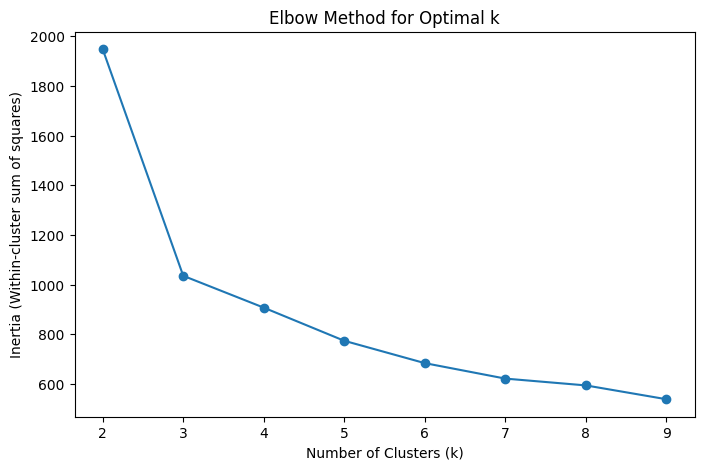

In [ ]:
import matplotlib.pyplot as plt

inertia = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features_for_clustering)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
# Train the final model with the optimal number of clusters (replace n_clusters with optimal k)
optimal_k = 4  # Example, update this based on results
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_cluster_labels = kmeans.fit_predict(features_for_clustering)

In [ ]:
# Create a DataFrame summarizing the cluster centers
cluster_summary = pd.DataFrame(kmeans.cluster_centers_, columns=features_for_clustering.columns)
print(cluster_summary)

   distance_ft      left       top  time_remaining  lebron_team_score  \
0     0.610819 -0.880515  0.582583        0.505554           0.412851   
1     0.158963  0.101079  0.178423        0.478360           0.435816   
2     0.666455  2.188451  0.471024        0.503062           0.417826   
3     0.683697 -2.291202  0.476983        0.497516           0.419304   

   opponent  opponent_team_score  
0  0.416426             0.431324  
1  0.451549             0.454509  
2  0.448688             0.434340  
3  0.459052             0.429933  


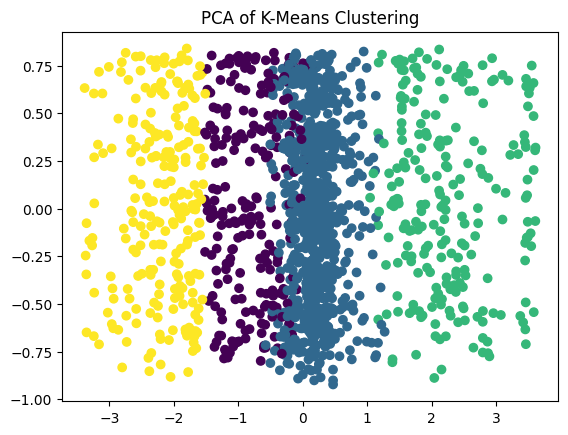

In [ ]:
# Perform PCA for visualization (if your data has high dimensions)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_df = pca.fit_transform(features_for_clustering)
plt.scatter(pca_df[:, 0], pca_df[:, 1], c=final_cluster_labels)
plt.title("PCA of K-Means Clustering")
plt.show()

In [ ]:
df1.head()

,top,left,qtr,time_remaining,result,shot_type,distance_ft,lead,lebron_team_score,opponent_team_score,opponent,cluster
0,310,203,1st Qtr,09:26,False,3,26,False,2,2,GSW,1
1,213,259,1st Qtr,08:38,False,2,16,False,4,5,GSW,0
2,143,171,1st Qtr,08:10,False,2,11,False,4,7,GSW,0
3,68,215,1st Qtr,05:24,True,2,3,False,12,19,GSW,0
4,66,470,1st Qtr,01:02,False,3,23,False,22,23,GSW,2


In [ ]:
import pandas as pd
# !pip install xlsxwriter
# Create an Excel writer object to save each cluster as a separate sheet
with pd.ExcelWriter('df1_by_cluster.xlsx', engine='xlsxwriter') as writer:
    # Loop over the unique clusters
    for cluster_id in df1['cluster'].unique():
        # Filter df1 by the current cluster
        cluster_data = df1[df1['cluster'] == cluster_id]

        # Write the filtered data to a sheet named after the cluster
        sheet_name = f'Cluster_{cluster_id}'
        cluster_data.to_excel(writer, sheet_name=sheet_name, index=False)

print("Export complete: df1_by_cluster.xlsx")

Export complete: df1_by_cluster.xlsx


In [ ]:
# Group the DataFrame by cluster and describe each cluster
for cluster_id in df['cluster'].unique():
  cluster_data = df[df['cluster'] == cluster_id]
  print(f"\nDescriptive Statistics for Cluster {cluster_id}:")
  print(cluster_data.describe())


Descriptive Statistics for Cluster 1:
              top        left         qtr  time_remaining      result  \
count  300.000000  300.000000  295.000000      300.000000  300.000000   
mean   210.286667  100.203333    2.410169     1538.296667    0.283333   
std     84.050259   45.582979    1.132947      872.874172    0.451370   
min     36.000000    2.000000    1.000000        0.000000    0.000000   
25%    146.750000   72.000000    1.000000      716.750000    0.000000   
50%    234.000000  101.000000    2.000000     1533.000000    0.000000   
75%    277.000000  129.000000    3.000000     2200.500000    1.000000   
max    364.000000  248.000000    4.000000     2863.000000    1.000000   

        shot_type  distance_ft        lead  lebron_team_score  \
count  300.000000   300.000000  300.000000         300.000000   
mean     2.626667    22.583333    0.496667          53.390000   
std      0.484498     5.482998    0.500824          35.701164   
min      2.000000     8.000000    0.000000 

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame containing shooting data with a 'cluster' column.
recommendations = []

# Group the DataFrame by cluster and describe each cluster
for cluster_id in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster_id]

    # Descriptive statistics for the cluster
    cluster_stats = cluster_data.describe()

    # Extract relevant statistics
    success_rate = cluster_stats.loc['mean', 'result'] * 100  # Convert to percentage
    mean_distance = cluster_stats.loc['mean', 'distance_ft']
    average_lebron_team_score = cluster_stats.loc['mean', 'lebron_team_score']
    average_opponent_team_score = cluster_stats.loc['mean', 'opponent_team_score']

    # Calculate the mean shot location (top, left)
    mean_top = cluster_data['top'].mean()
    mean_left = cluster_data['left'].mean()

    # Generate recommendations based on the statistics
    if success_rate > 60:
        recommendations.append(
            f"Cluster {cluster_id}: Continue to take shots at location ({mean_top:.2f}, {mean_left:.2f}), focus on maintaining consistency. "
            f"(Success Rate: {success_rate:.2f}%, Avg Distance: {mean_distance:.2f} ft, "
            f"Avg Team Score: {average_lebron_team_score:.2f}, Avg Opponent Score: {average_opponent_team_score:.2f})"
        )
    elif success_rate < 30:
        recommendations.append(
            f"Cluster {cluster_id}: Re-evaluate shot selection at location ({mean_top:.2f}, {mean_left:.2f}), consider passing or driving to the basket instead. "
            f"(Success Rate: {success_rate:.2f}%, Avg Distance: {mean_distance:.2f} ft, "
            f"Avg Team Score: {average_lebron_team_score:.2f}, Avg Opponent Score: {average_opponent_team_score:.2f})"
        )
    else:
        if mean_distance > 20:
            recommendations.append(
                f"Cluster {cluster_id}: Work on improving long-distance shooting mechanics at location ({mean_top:.2f}, {mean_left:.2f}) to increase success rate. "
                f"(Success Rate: {success_rate:.2f}%, Avg Distance: {mean_distance:.2f} ft, "
                f"Avg Team Score: {average_lebron_team_score:.2f}, Avg Opponent Score: {average_opponent_team_score:.2f})"
            )
        else:
            recommendations.append(
                f"Cluster {cluster_id}: Focus on creating more opportunities closer to the basket at location ({mean_top:.2f}, {mean_left:.2f}) for better efficiency. "
                f"(Success Rate: {success_rate:.2f}%, Avg Distance: {mean_distance:.2f} ft, "
                f"Avg Team Score: {average_lebron_team_score:.2f}, Avg Opponent Score: {average_opponent_team_score:.2f})"
            )

# Print recommendations
for recommendation in recommendations:
    print(recommendation)

Cluster 1: Re-evaluate shot selection at location (210.29, 100.20), consider passing or driving to the basket instead. (Success Rate: 28.33%, Avg Distance: 22.58 ft, Avg Team Score: 53.39, Avg Opponent Score: 53.20)
Cluster 0: Continue to take shots at location (86.88, 237.86), focus on maintaining consistency. (Success Rate: 64.32%, Avg Distance: 4.32 ft, Avg Team Score: 60.74, Avg Opponent Score: 59.98)
Cluster 2: Work on improving long-distance shooting mechanics at location (202.32, 380.49) to increase success rate. (Success Rate: 37.20%, Avg Distance: 22.25 ft, Avg Team Score: 59.17, Avg Opponent Score: 58.52)
Cluster 3: Work on improving long-distance shooting mechanics at location (314.79, 214.62) to increase success rate. (Success Rate: 35.17%, Avg Distance: 26.95 ft, Avg Team Score: 68.83, Avg Opponent Score: 67.20)


### Shooting Recommendations for LeBron James

Based on the analysis of LeBron James' shooting data, we have identified four distinct clusters, each with specific recommendations for shot selection and performance improvement. Below are the details for each cluster:

## Cluster 1
- **Location**: (210.29, 100.20)
- **Recommendation**: Re-evaluate shot selection at this location. It may be more beneficial to consider passing or driving to the basket instead.
- **Success Rate**: 28.33%
- **Average Distance**: 22.58 ft
- **Average Team Score**: 53.39
- **Average Opponent Score**: 53.20

**Advanced Insight**: The low success rate indicates that shots from this location are not effective. Analyzing the defense's positioning may reveal opportunities for better passing options or driving lanes, especially since the average distance is relatively far from the basket.

---

## Cluster 0
- **Location**: (86.88, 237.86)
- **Recommendation**: Continue taking shots from this location while focusing on maintaining consistency.
- **Success Rate**: 64.32%
- **Average Distance**: 4.32 ft
- **Average Team Score**: 60.74
- **Average Opponent Score**: 59.98

**Advanced Insight**: This cluster represents a high success rate from a very close distance. It’s essential to capitalize on this by increasing the frequency of shots taken from this spot while also considering how to leverage these scoring opportunities to create open shots for teammates.

---

## Cluster 2
- **Location**: (202.32, 380.49)
- **Recommendation**: Focus on improving long-distance shooting mechanics at this location to increase the success rate.
- **Success Rate**: 37.20%
- **Average Distance**: 22.25 ft
- **Average Team Score**: 59.17
- **Average Opponent Score**: 58.52

**Advanced Insight**: With a moderate success rate from a long distance, refining shooting techniques and developing better shot selection can lead to significant improvements. Analyzing shooting form and consistency during practice may help elevate performance in this area, while also considering defensive matchups that may impact shooting success.

---

## Cluster 3
- **Location**: (314.79, 214.62)
- **Recommendation**: Work on enhancing long-distance shooting mechanics at this location to improve the success rate.
- **Success Rate**: 35.17%
- **Average Distance**: 26.95 ft
- **Average Team Score**: 68.83
- **Average Opponent Score**: 67.20

**Advanced Insight**: Similar to Cluster 2, the success rate for shots taken from this distance is low. It is vital to analyze shot selection and make adjustments based on defensive pressure and spacing. Focusing on shot timing and conditioning can also play a crucial role in improving performance from long-range shots.

---

# Overall Analysis

The shooting data indicates that LeBron has a mix of effective and ineffective shooting locations.

- **Consistency in Close Range**: The high success rate in Cluster 0 showcases LeBron's effectiveness near the basket. He should continue to exploit these opportunities while integrating more drives and passes into his game to maximize scoring potential.

- **Improving Long-Distance Shooting**: Clusters 2 and 3 show that while LeBron is taking long-range shots, his success rates are not satisfactory. Improvement in shooting technique and shot selection will be crucial in making these shots more reliable, especially in high-pressure situations.

- **Strategic Decision-Making**: The recommendations suggest a blend of shot taking and alternative strategies, like passing or driving, which may create more advantageous situations. Continuous assessment of defensive formations and the dynamic of the game can aid in determining the best course of action during gameplay.

- **Data-Driven Insights**: Leveraging analytics can help in understanding opponent weaknesses and identifying favorable matchups. The use of video analysis and player tracking can provide additional context to shot selection and performance, leading to more informed decisions on the court.
